In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
data = load_breast_cancer(as_frame=True)
df = data.frame

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


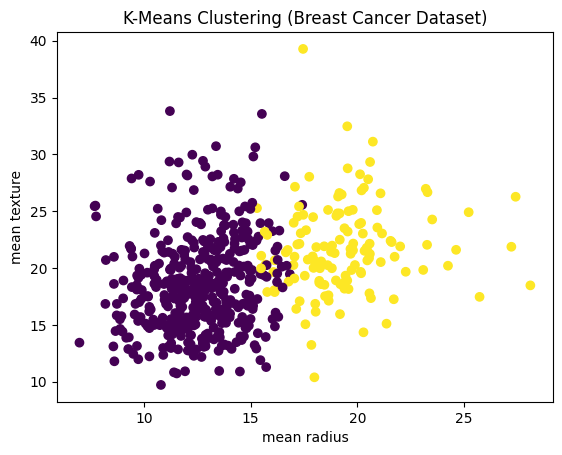

In [4]:
kmeans = KMeans(n_clusters=2) 
clusters = kmeans.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('K-Means Clustering (Breast Cancer Dataset)')
plt.show()

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred_validation = clf.predict(X_validation)
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
report_validation = classification_report(y_validation, y_pred_validation)

print(f'Accuracy on Validation Set: {accuracy_validation}')
print(report_validation)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print(f'Accuracy on Test Set: {accuracy_test*100}')
print(report_test)


Accuracy on Validation Set: 0.9764705882352941
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.98      0.98      0.98        48

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Accuracy on Test Set: 96.51162790697676
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.98      0.97      0.97        60

    accuracy                           0.97        86
   macro avg       0.95      0.96      0.96        86
weighted avg       0.97      0.97      0.97        86



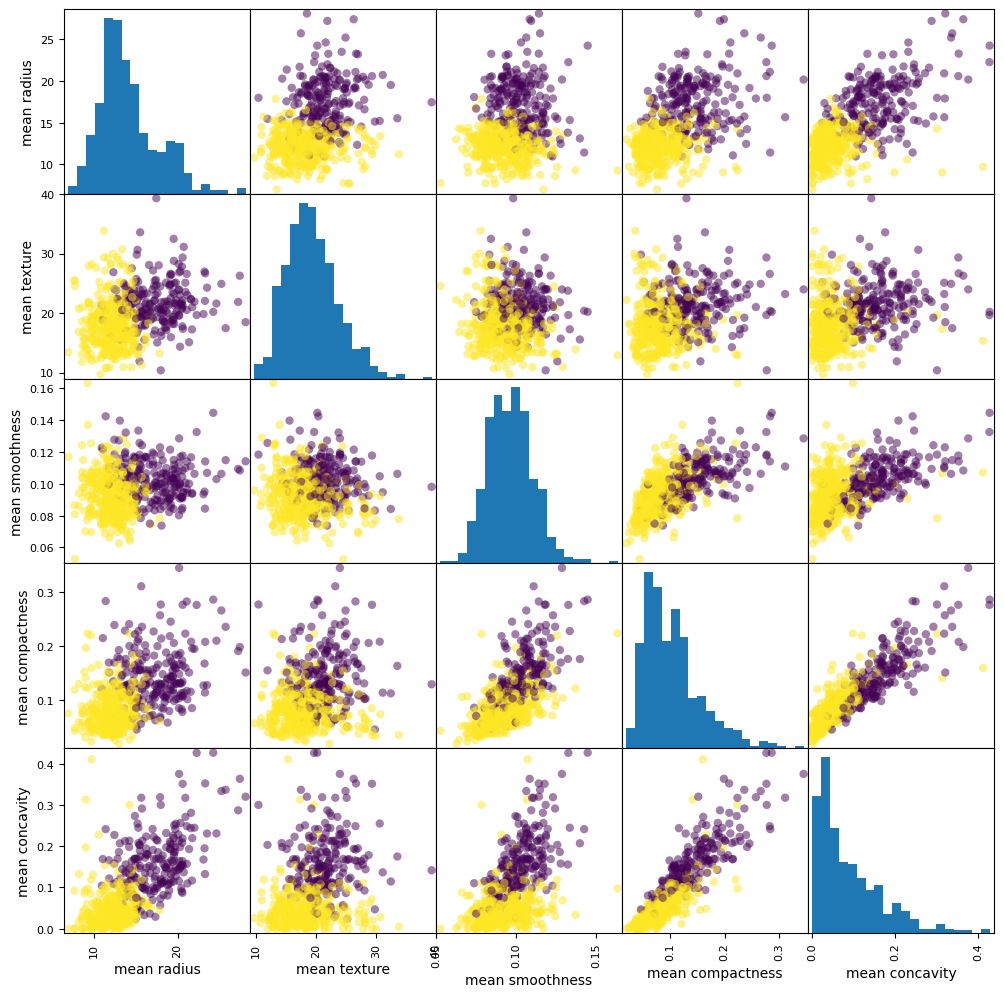

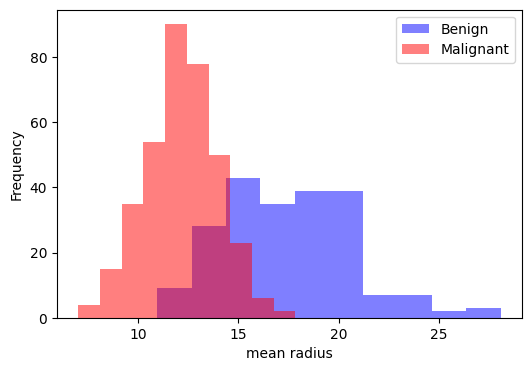

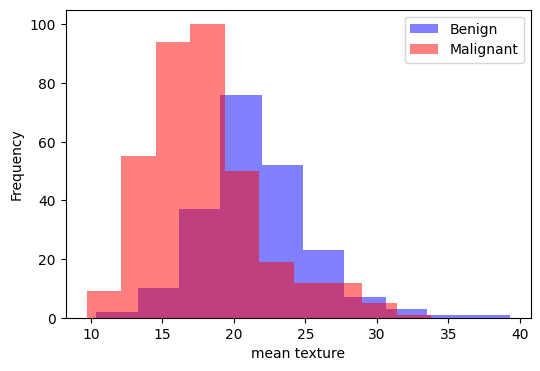

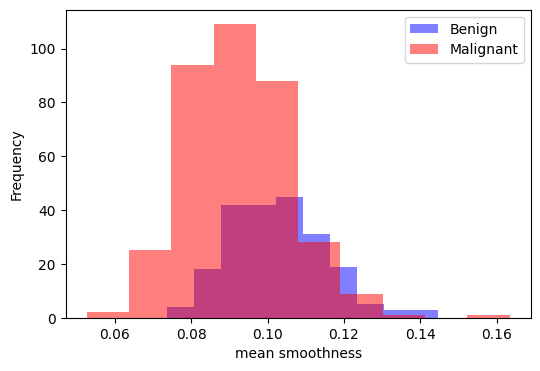

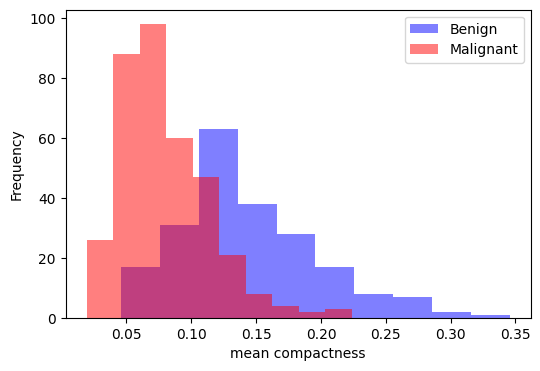

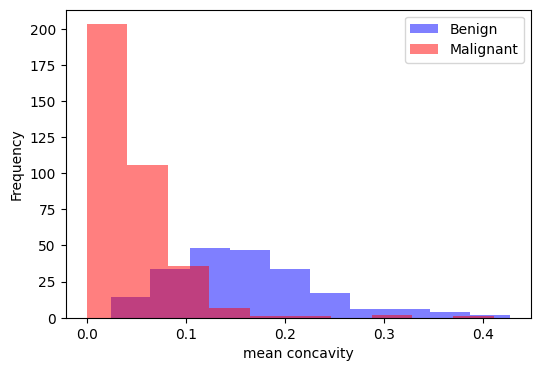

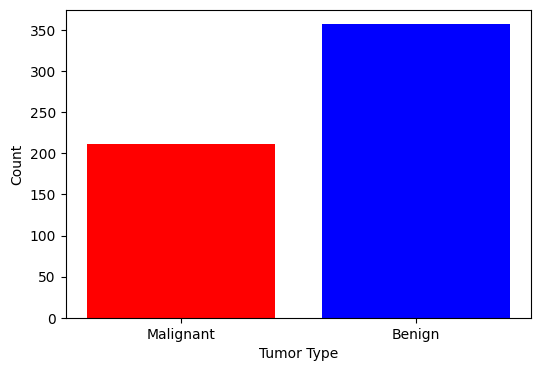

In [12]:
#visualize the data using a scatter plot
df = pd.concat([X, y], axis=1)

# Create a pair plot for selected features
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity']
pair_plot = pd.plotting.scatter_matrix(df[selected_features], c=y, figsize=(12, 12), marker='o', hist_kwds={'bins': 20})

# Plot histograms of selected features for malignant (1) and benign (0) cases
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[df['target'] == 0][feature], color='blue', alpha=0.5, label='Benign')
    plt.hist(df[df['target'] == 1][feature], color='red', alpha=0.5, label='Malignant')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

# Create a bar plot of the target variable
target_counts = df['target'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.xticks(target_counts.index, ['Benign', 'Malignant'])
plt.xlabel('Tumor Type')
plt.ylabel('Count')

plt.show()

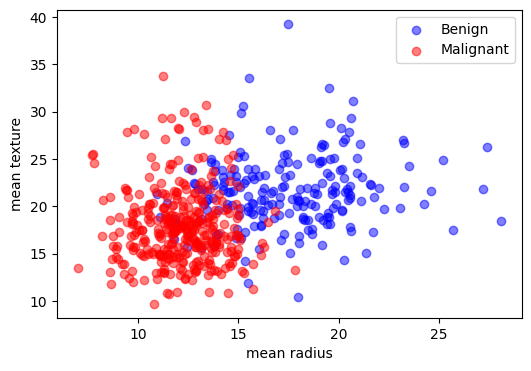

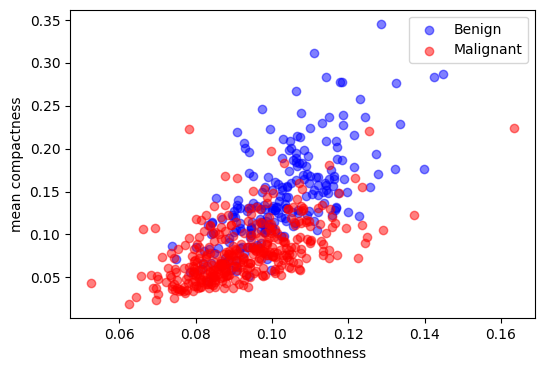

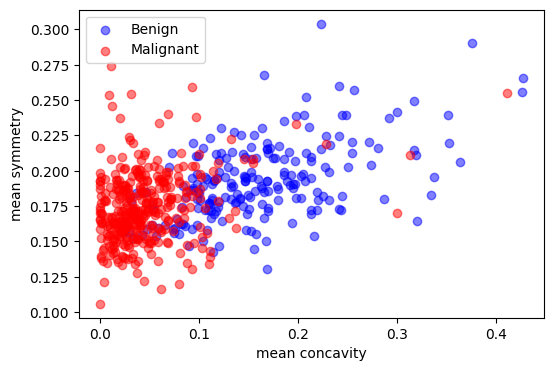

In [13]:
feature_pairs = [('mean radius', 'mean texture'), ('mean smoothness', 'mean compactness'), ('mean concavity', 'mean symmetry')]

# Create scatter plots for each feature pair
for feature_x, feature_y in feature_pairs:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[df['target'] == 0][feature_x], df[df['target'] == 0][feature_y], c='blue', label='Benign', alpha=0.5)
    plt.scatter(df[df['target'] == 1][feature_x], df[df['target'] == 1][feature_y], c='red', label='Malignant', alpha=0.5)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()

plt.show()